In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
social_data = "data\sentimentdataset.csv"
happyness_data = "data\WorldHappinessIndex2013-2023.csv"
happyness_data2 = r"data\UnionHappinessFile.csv"

# Read the mouse data and the study results
happyness_df = pd.read_csv(happyness_data)
happyness_df2 = pd.read_csv(happyness_data2)
social_df = pd.read_csv(social_data)

In [8]:
social_df2 = social_df[['Country', 'Year','Platform','Sentiment','Hashtags']]
happyness_df['Country'] = happyness_df['Country'].replace('United States', 'USA')
happyness_df['Country'] = happyness_df['Country'].replace('United Kingdom', 'UK')

In [9]:
happyness_df2['country'] = happyness_df2['country'].replace('United States', 'USA')
happyness_df2['country'] = happyness_df2['country'].replace('United Kingdom', 'UK')

In [10]:
# social_df2.info()
social_df2['Country'] = social_df2['Country'].str.strip()
unique_values = social_df2['Country'].unique()
print(unique_values)

['USA' 'Canada' 'UK' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']


C:\Users\nigro\AppData\Local\Temp\ipykernel_25340\1694308257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_df2['Country'] = social_df2['Country'].str.strip()


In [11]:
# happyness_df.info()
unique_values2 = happyness_df['Country'].unique()
print(unique_values2)

['Afghanistan' 'Singapore' 'Comoros' 'Sierra Leone' 'Congo' 'Serbia'
 'Congo Brazzaville' 'Senegal' 'Congo Kinshasa' 'Saudi Arabia' 'Rwanda'
 'Costa Rica' 'Russia' 'Croatia' 'Romania' 'Colombia' 'Cyprus' 'Czechia'
 'Puerto Rico' 'Denmark' 'Portugal' 'Poland' 'Djibouti' 'Philippines'
 'Dominican Republic' 'Peru' 'Ecuador' 'Paraguay' 'Egypt' 'Panama'
 'El Salvador' 'Qatar' 'Slovakia' 'Slovenia' 'China' 'Thailand' 'Bhutan'
 'Tanzania' 'Bolivia' 'Tajikistan' 'Bosnia and Herzegovina' 'Taiwan'
 'Botswana' 'Syria' 'Brazil' 'Switzerland' 'Sweden' 'Bulgaria' 'Swaziland'
 'Burkina Faso' 'Suriname' 'Burundi' 'Somalia' 'Chile' 'Somaliland' 'Chad'
 'South Africa' 'Central African Republic' 'Palestine' 'South Korea'
 'South Sudan' 'Spain' 'Cameroon' 'Sri Lanka' 'Cambodia' 'Sudan' 'Canada'
 'Togo' 'Pakistan' 'Oman' 'Iceland' 'Malta' 'India' 'Mali' 'Indonesia'
 'Maldives' 'Malaysia' 'Iran' 'Malawi' 'Iraq' 'Madagascar' 'Ireland'
 'Luxembourg' 'Israel' 'Mauritania' 'Lithuania' 'Libya' 'Liberia'
 'Ivory 

In [15]:
happyness_df2 = happyness_df2.rename(columns = {'country':'Country'})
unique_values3 = happyness_df2['Country'].unique()
print(unique_values3)

['Palestinian Territories' 'Malaysia' 'Zambia' 'Congo (Brazzaville)'
 'Somalia' 'Botswana' 'Algeria' 'Lithuania' 'Turkiye' 'Slovakia' 'Hungary'
 'China' 'Niger' 'Costa Rica' 'Somaliland Region' 'Brazil' 'Latvia'
 'Vietnam' 'Canada' 'Ireland' 'Nigeria' 'Sweden' 'Tanzania' 'Switzerland'
 'New Zealand' 'Armenia' 'Senegal' 'Italy' 'Jordan' 'Nepal' 'Malta'
 'United Arab Emirates' 'Portugal' 'Rwanda*' 'Greece' 'Azerbaijan'
 'Colombia' 'Hong Kong S.A.R. of China' 'Benin' 'Iraq' 'France'
 'Madagascar' 'Mauritius' 'Singapore' 'Burkina Faso' 'Denmark' 'Qatar'
 'Thailand' 'Hong Kong S.A.R., China' 'Germany' 'Panama' 'Northern Cyprus'
 'Japan' 'Bangladesh' 'Lesotho' 'Bolivia' 'Australia' 'Chile' 'Angola'
 'Gambia' 'Croatia' 'Czech Republic' 'Chad' 'Haiti' 'Togo' 'Mexico'
 'Hong Kong' 'Taiwan Province of China' 'Guinea' 'Cyprus' 'Estonia'
 'South Africa' 'Bosnia and Herzegovina' 'Ethiopia' 'Mongolia' 'Uruguay'
 'Pakistan' 'Dominican Republic' 'South Korea' 'UK' 'South Sudan'
 'Cameroon' 'Tajikistan

In [16]:
study_df = pd.merge(happyness_df2, happyness_df, on=['Country', 'Year'], how='left')
study_df.head(10)

,Year,Country,ladder_score,gdp_per_capita,generosity,social_support,corruption,Index,Rank
0,2016,Palestinian Territories,4.7540,0.670240,0.111540,0.716290,0.106130,NaN,NaN
1,2022,Malaysia,5.7110,NaN,NaN,NaN,NaN,5.711,70.0
2,2020,Zambia,3.7594,8.224720,0.078037,0.698824,0.801290,3.759,141.0
3,2023,Congo (Brazzaville),5.2670,8.095000,-0.004000,0.605000,0.739000,NaN,NaN
4,2019,Somalia,4.6680,0.000000,0.243000,0.698000,0.270000,4.668,112.0
5,2020,Botswana,3.4789,9.711204,-0.250394,0.779122,0.777931,3.479,147.0
6,2018,Algeria,5.2950,0.979000,0.055000,1.154000,0.135000,5.295,84.0
7,2019,Lithuania,6.1490,1.238000,0.043000,1.515000,0.042000,6.149,42.0
8,2023,Turkiye,4.6140,10.307000,-0.077000,0.796000,0.795000,4.614,106.0
9,2021,Slovakia,6.3310,10.369000,-0.124000,0.936000,0.911000,6.331,34.0


In [17]:
sentiment_df = pd.merge(study_df, social_df2, on=['Country', 'Year'], how='left')
sentiment_df.head(10)

,Year,Country,ladder_score,gdp_per_capita,generosity,social_support,corruption,Index,Rank,Platform,Sentiment,Hashtags
0,2016,Palestinian Territories,4.7540,0.670240,0.111540,0.716290,0.106130,NaN,NaN,NaN,NaN,NaN
1,2022,Malaysia,5.7110,NaN,NaN,NaN,NaN,5.711,70.0,NaN,NaN,NaN
2,2020,Zambia,3.7594,8.224720,0.078037,0.698824,0.801290,3.759,141.0,NaN,NaN,NaN
3,2023,Congo (Brazzaville),5.2670,8.095000,-0.004000,0.605000,0.739000,NaN,NaN,NaN,NaN,NaN
4,2019,Somalia,4.6680,0.000000,0.243000,0.698000,0.270000,4.668,112.0,NaN,NaN,NaN
5,2020,Botswana,3.4789,9.711204,-0.250394,0.779122,0.777931,3.479,147.0,NaN,NaN,NaN
6,2018,Algeria,5.2950,0.979000,0.055000,1.154000,0.135000,5.295,84.0,NaN,NaN,NaN
7,2019,Lithuania,6.1490,1.238000,0.043000,1.515000,0.042000,6.149,42.0,NaN,NaN,NaN
8,2023,Turkiye,4.6140,10.307000,-0.077000,0.796000,0.795000,4.614,106.0,NaN,NaN,NaN
9,2021,Slovakia,6.3310,10.369000,-0.124000,0.936000,0.911000,6.331,34.0,NaN,NaN,NaN


In [18]:
sentiment_df2 = sentiment_df.dropna(how ='any')
sentiment_df2.head(10)

,Year,Country,ladder_score,gdp_per_capita,generosity,social_support,corruption,Index,Rank,Platform,Sentiment,Hashtags
16,2019,Brazil,6.300,1.004000,0.09900,1.439000,0.086000,6.300,32.0,Twitter,Heartbreak,#Heartbreak #CalmAfterStorm
17,2019,Brazil,6.300,1.004000,0.09900,1.439000,0.086000,6.300,32.0,Facebook,Kindness,#Kindness #LoveStitches
18,2019,Brazil,6.300,1.004000,0.09900,1.439000,0.086000,6.300,32.0,Twitter,Disappointment,#Disappointment #SoccerDefeats
21,2017,Canada,7.316,1.479204,0.43554,1.481349,0.287372,7.316,7.0,Facebook,Hope,#Hope #BusinessVenture
22,2017,Canada,7.316,1.479204,0.43554,1.481349,0.287372,7.316,7.0,Facebook,Envy,#Envy #Success
23,2017,Canada,7.316,1.479204,0.43554,1.481349,0.287372,7.316,7.0,Instagram,Mindfulness,#Mindfulness #LakeTranquility
24,2017,Canada,7.316,1.479204,0.43554,1.481349,0.287372,7.316,7.0,Instagram,InnerJourney,#InnerJourney #MeditationBliss
42,2016,Greece,5.033,1.248860,0.00000,0.754730,0.041270,5.033,99.0,Facebook,Curiosity,#Curiosity #AncientDiscovery
43,2016,Greece,5.033,1.248860,0.00000,0.754730,0.041270,5.033,99.0,Facebook,Serenity,#Serenity #SunsetHues
49,2016,France,6.478,1.394880,0.12160,1.005080,0.178080,6.478,32.0,Instagram,Positivity,#Positivity #SoulUpliftment


In [19]:
sentiment_df2['Sentiment']= sentiment_df2['Sentiment'].str.strip()
emotions = sentiment_df2['Sentiment'].unique()


C:\Users\nigro\AppData\Local\Temp\ipykernel_25340\1010706529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df2['Sentiment']= sentiment_df2['Sentiment'].str.strip()


In [35]:
emotions_df =pd.DataFrame(emotions)
emotions_df.to_csv("emotion_df.csv")

In [37]:
positive_emoID = [3, 1, 11, 9, 10, 8, 24, 25, 22, 31, 32, 34, 36, 59, 58, 39, 41, 42, 68, 69, 70, 46, 48, 64, 65, 83, 85, 88, 90, 94, 95, 97, 98, 101, 102, 103, 104, 105, 107, 108, 110, 113, 118, 120, 121, 123, 124, 125, 127, 128, 138, 139, 141, 142, 143, 145, 146, 148, 155, 156, 157, 168, 170, 171, 172, 174, 175, 177, 178]

In [38]:
negative_emoID = [0, 2, 4, 14, 15, 16, 17, 18, 19, 44, 45, 72, 73, 74, 76, 77, 81, 84, 86, 92, 129, 130, 131, 132, 164]

In [39]:
neutral_emoID = [5, 6, 7, 29, 30, 51, 53, 54, 55, 56, 60, 62, 63, 66, 67, 70, 71, 75, 78, 79, 80, 82, 85, 87, 89, 91, 93, 96, 99, 100, 109, 111, 112, 114, 115, 116, 117, 119, 149, 150, 151, 152, 153, 154, 164, 165, 167, 169, 173, 176]

In [40]:
positive_emo = emotions[positive_emoID]
negative_emo = emotions[negative_emoID]
neutral_emo = emotions[neutral_emoID]

print(len(positive_emo))
print(len(negative_emo))
print(len(neutral_emo))

69
25
50


In [42]:
positive_df = []
for index, row in sentiment_df2.iterrows():
    if row['Sentiment'] in positive_emo:
        positive_df.append(row)

positive_df = pd.DataFrame(positive_df)

In [43]:
negative_df = []
for index, row in sentiment_df2.iterrows():
    if row['Sentiment'] in negative_emo:
        negative_df.append(row)

negative_df =pd.DataFrame(negative_df)

In [44]:
neutral_df = []
for index, row in sentiment_df2.iterrows():
    if row['Sentiment'] in neutral_emo:
        neutral_df.append(row)

neutral_df = pd.DataFrame(neutral_df)

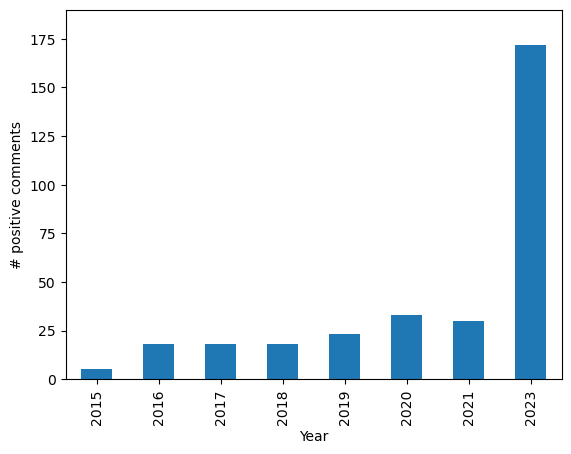

In [45]:
positive_df.groupby('Year')['Sentiment'].count().plot(kind='bar', ylabel='# positive comments')
plt.ylim(0, 190)
plt.show()

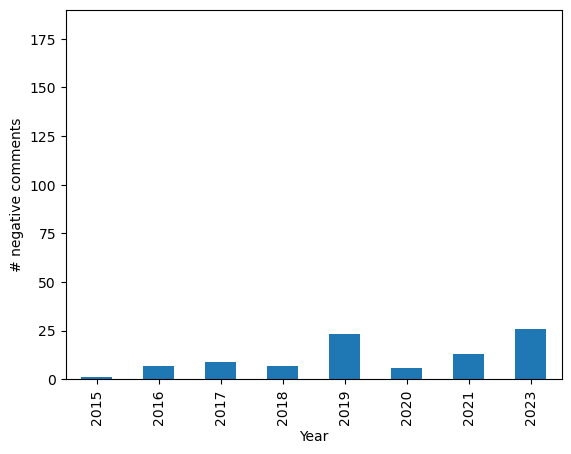

In [46]:
negative_df.groupby('Year')['Sentiment'].count().plot(kind='bar', ylabel='# negative comments')
plt.ylim(0, 190)
plt.show()

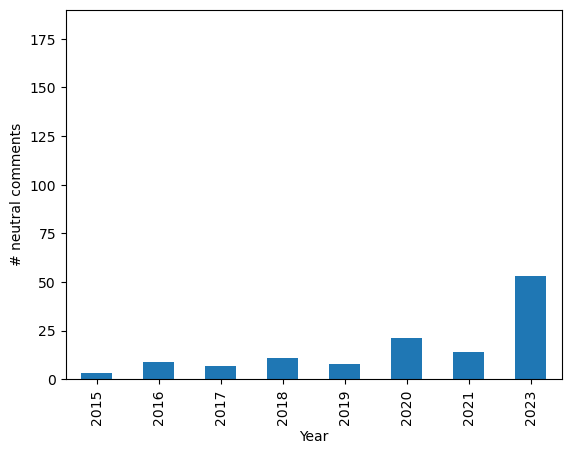

In [47]:
neutral_df.groupby('Year')['Sentiment'].count().plot(kind='bar', ylabel='# neutral comments')
plt.ylim(0, 190)
plt.show()

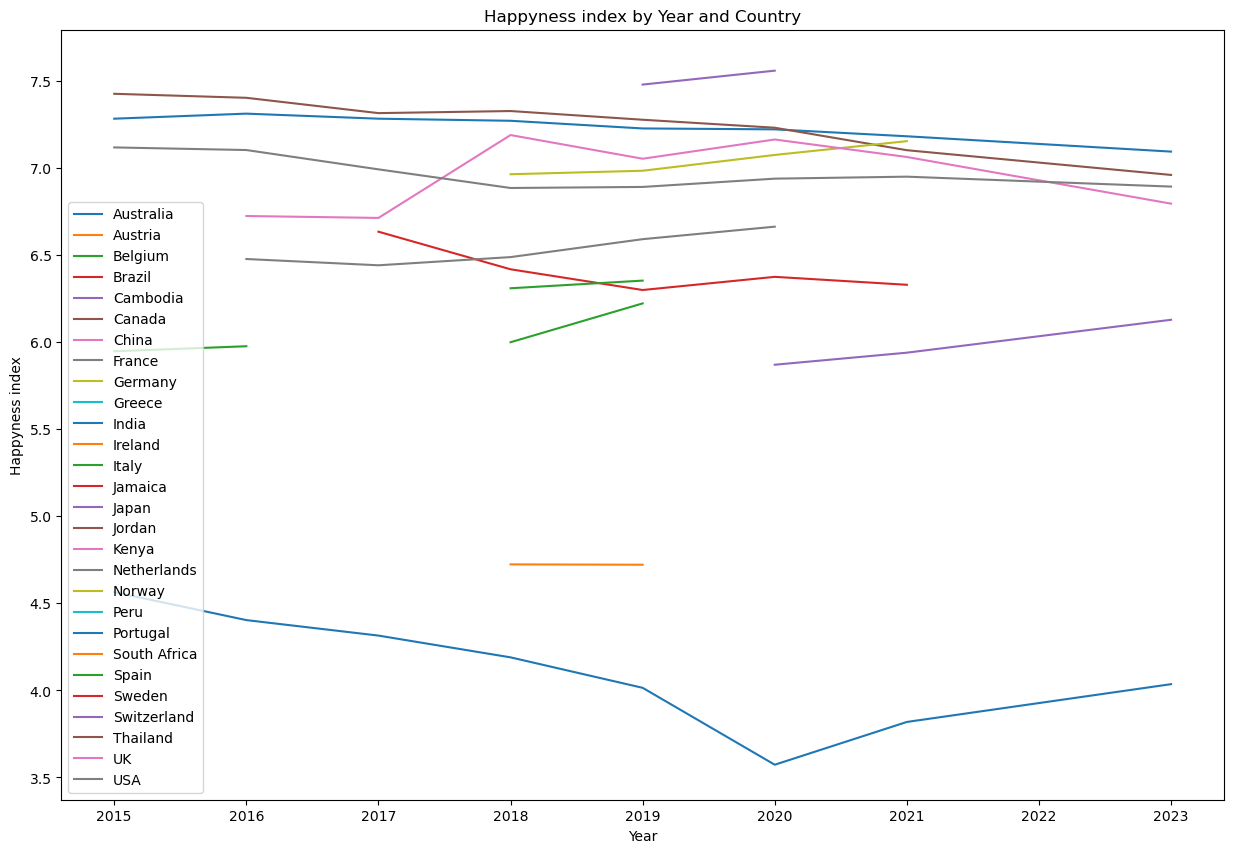

In [52]:
grouped_data = sentiment_df2.groupby(['Year', 'Country'])['ladder_score'].mean().unstack()

# Plot each country's data as a separate line
plt.figure(figsize=(15, 10))
for country in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[country], label=country)

plt.xlabel('Year')
plt.ylabel('Happyness index')
plt.title('Happyness index by Year and Country')
plt.legend()  # Add legend to differentiate different countries
plt.show()


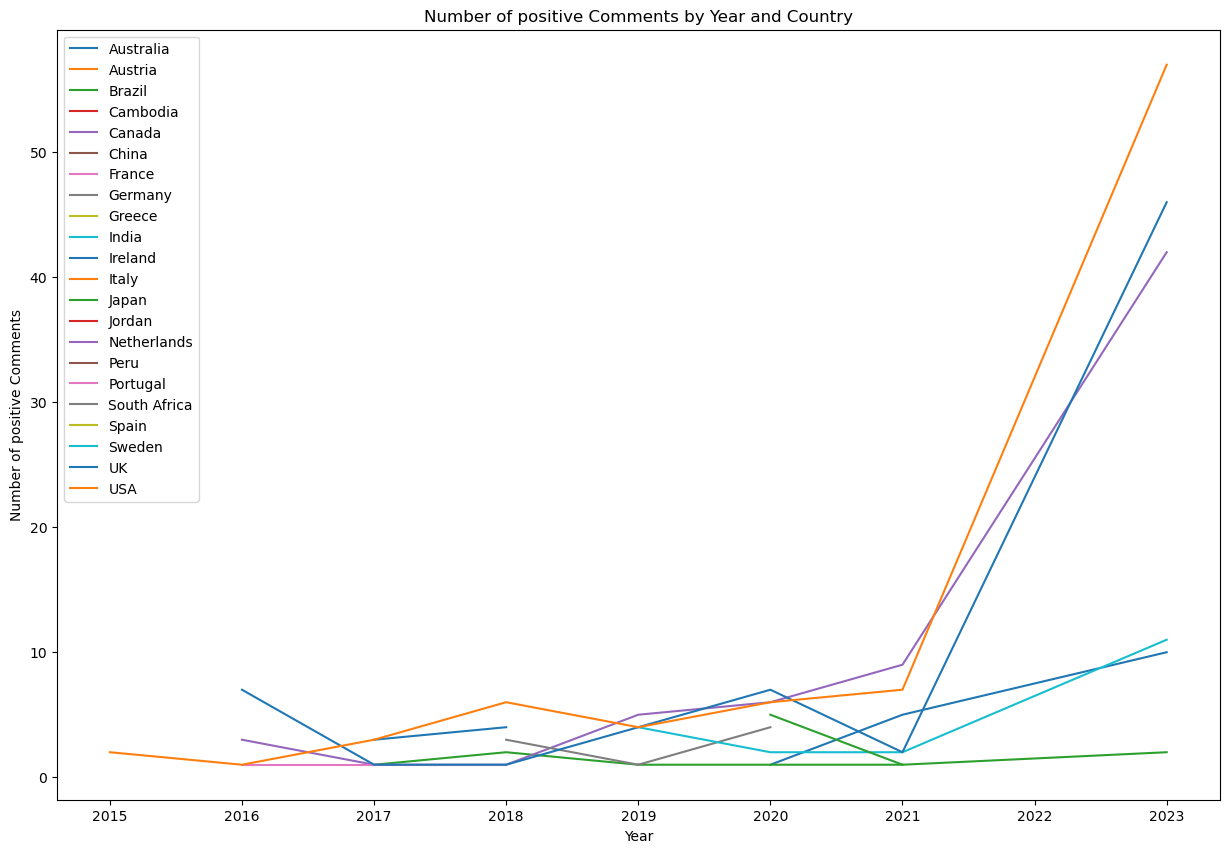

In [49]:
grouped_data = positive_df.groupby(['Year', 'Country'])['Sentiment'].count().unstack()

# Plot each country's data as a separate line
plt.figure(figsize=(15, 10))
for country in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[country], label=country)

plt.xlabel('Year')
plt.ylabel('Number of positive Comments')
plt.title('Number of positive Comments by Year and Country')
plt.legend()  # Add legend to differentiate different countries
plt.show()


In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(, )
pe_fit = pe_slope * np.array(mice_capomulin_weight) + pe_int
print(f'The correlation between mouse weight and the average tumor volume is {round(pe_r,2)}')

plt.scatter(e)
plt.plot(,pe_fit,'-',color='red')
plt.xlabel('')
plt.ylabel('')
plt.show()
